In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import csv
import seaborn as sns

In [2]:
# 获取距离字典
distance_dict = {}
dis_matrix = []
with open('data\distance_matrix.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        dis_matrix.append([float(i) for i in row])

for row in range(1, len(dis_matrix)+1):
    for col in range(1, len(dis_matrix[0])+1):
        if row in distance_dict.keys():
            distance_dict[row][col] = dis_matrix[row-1][col-1]
        else:
            distance_dict[row] = {col: dis_matrix[row-1][col-1]}

In [3]:
dis_dict = {}
flow_dict = {}
for time in [2019, 2020, 2023]:
    file_path = f'E:\Project\Academic\虚实网络\Virtual and Real City Network\DataDraw\search_{time}_normalized.csv'
    dis_list = []
    flow_list = []
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        head = next(reader)
        for row in reader:
            startcity = int(row[0])
            endcity = int(row[1])
            flow = float(row[6])
            dis_list.append(distance_dict[startcity][endcity])
            flow_list.append(flow)

    dis_dict[time] = dis_list
    flow_dict[time] = flow_list

Text(0.5, 1.0, '2020')

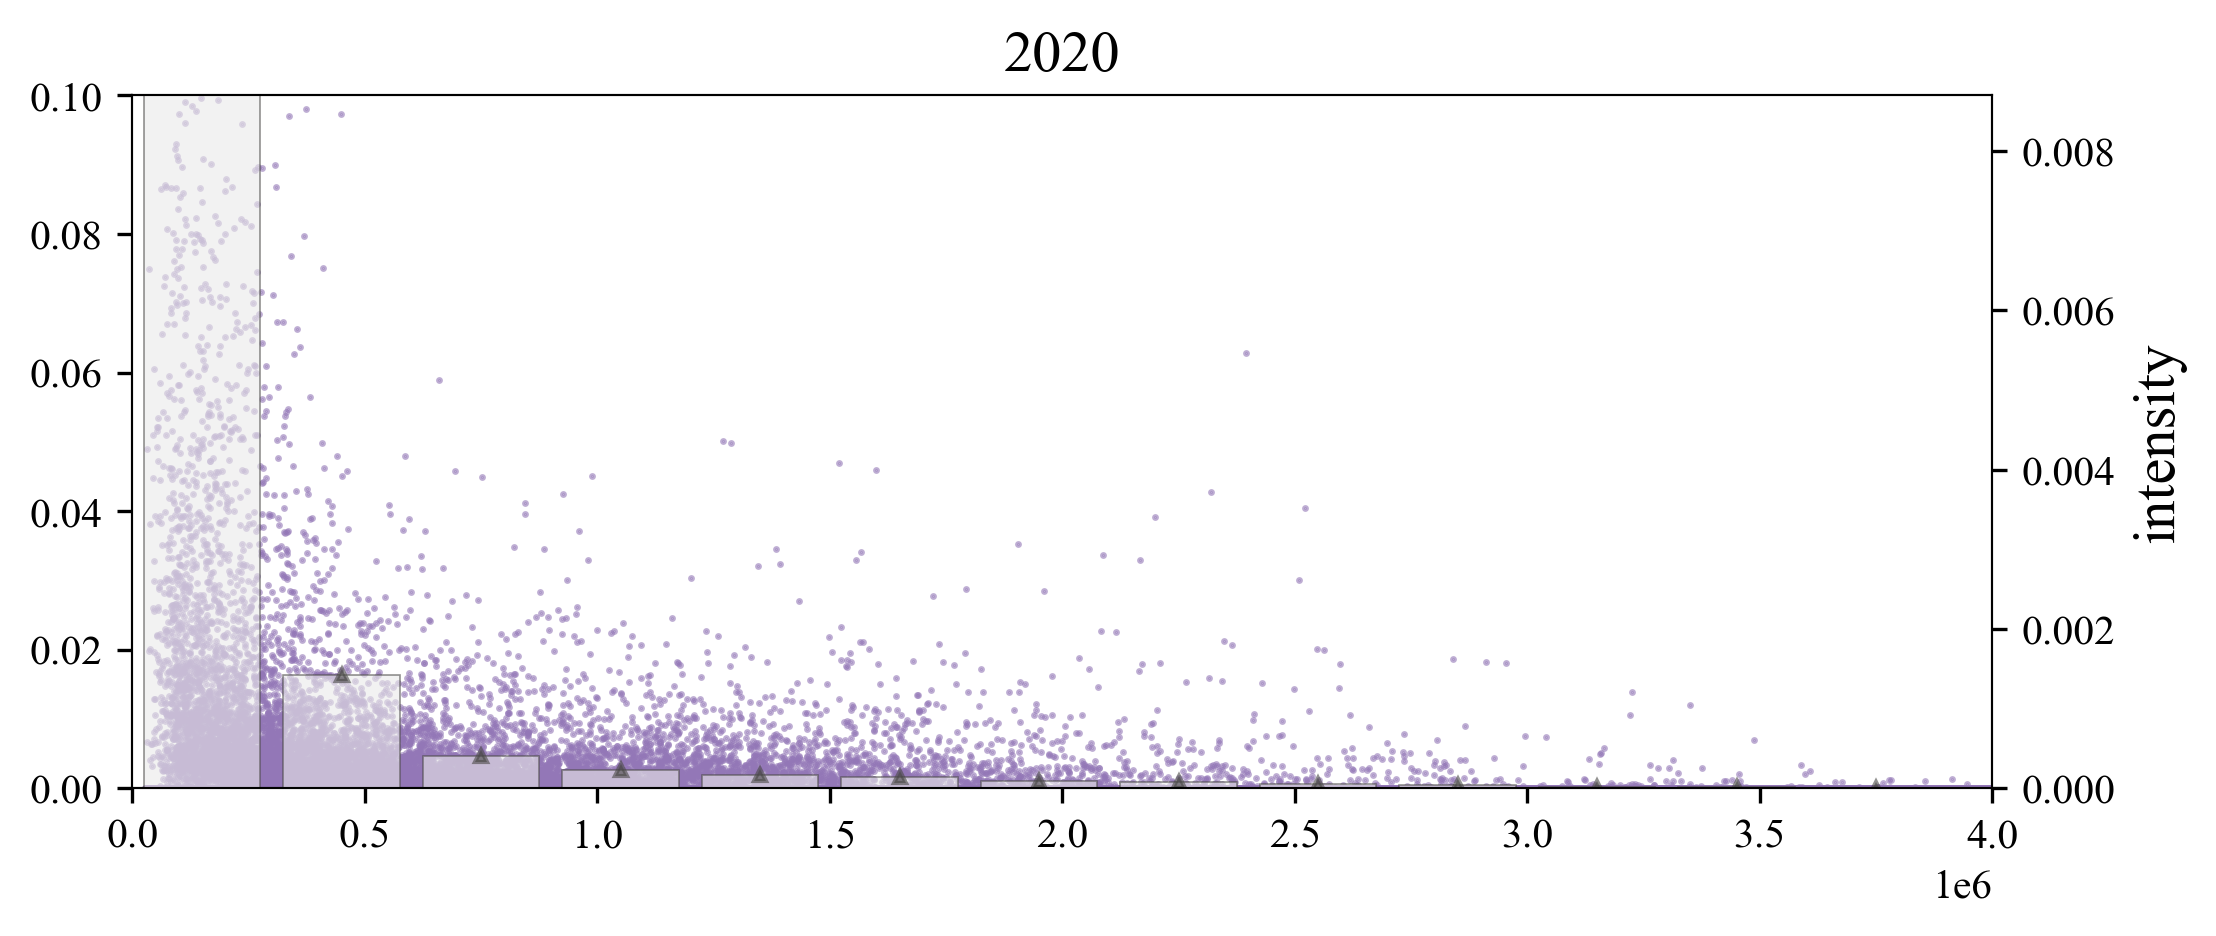

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 3), dpi=300)
plt.rcParams['font.family'] = 'Times New Roman'

color = "#9377b7"
time_list = [2019, 2020, 2023]

## 通过改i选时间！！！！！！！！！！！
i = 1

x = np.array(dis_dict[time_list[i]])
y = np.array(flow_dict[time_list[i]])

# 指定步长
step_size = 300000
data = pd.DataFrame({'x': x, 'y': y})
data['x_bin'] = (data['x'] // step_size) * step_size + step_size/2

grouped_data = data.groupby('x_bin').mean().reset_index()
ax1.scatter(dis_dict[time_list[i]], flow_dict[time_list[i]], s = 0.4, c=color, alpha=0.6)
ax1.set_ylim(0, 0.1)
ax1.set_xlim(0, 4e6)

ax2 = ax1.twinx()
ax2.bar(grouped_data['x_bin'], grouped_data['y'], width=250000, color='#EAEAEA', edgecolor = '#4A4947', linewidth = 0.4, alpha=0.6)

for n, value in enumerate(grouped_data['y']):
    ax2.plot(grouped_data['x_bin'][n], value, marker='^', markersize=3, color='#4A4947', alpha=0.6) 

ax2.set_ylim(0, 0.0087)
ax2.set_xlim(0, 4e6)

ax1.spines['top'].set_linewidth(0.5)    # 顶部轴线
ax1.spines['right'].set_linewidth(0.5)  # 右侧轴线
ax1.spines['bottom'].set_linewidth(0.5) # 底部轴线
ax1.spines['left'].set_linewidth(0.5)   # 左侧轴线
ax2.spines['top'].set_linewidth(0.5)    # 顶部轴线
ax2.spines['right'].set_linewidth(0.5)  # 右侧轴线
ax2.spines['bottom'].set_linewidth(0.5) # 底部轴线
ax2.spines['left'].set_linewidth(0.5)   # 左侧轴线

plt.xlabel('Distance', fontsize=14)
plt.ylabel('intensity', fontsize=14)
plt.title(f'{time_list[i]}', fontsize=14)

(0.0, 3.2)

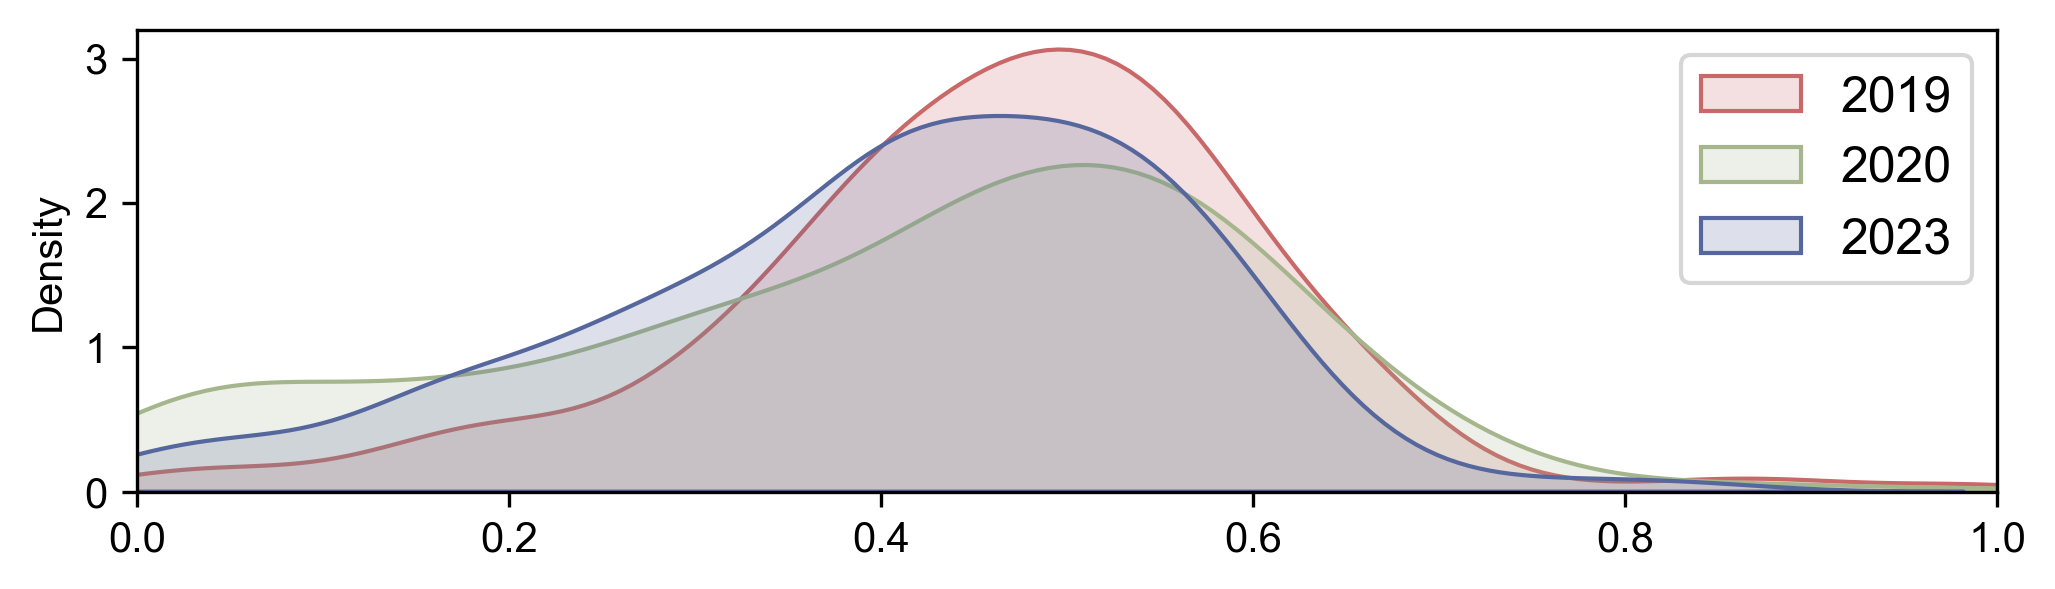

In [4]:
time_list = [2019, 2020, 2023]
color_list = ['#C96868', '#A5B68D', '#55679C']
plt.rcParams['font.family'] = 'Arial'

flow_list = []
for time in time_list:
    flow_list_time = []
    file_path = f'E:\Project\Academic\虚实网络\Virtual and Real City Network\DataDraw\search_{time}_normalized_correspond.csv'
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        head = next(reader)
        for row in reader:
            flow = float(row[6])
            flow_list_time.append(flow)
    flow_list_time = np.array(flow_list_time)
    flow_list_time = flow_list_time[flow_list_time>0]
    flow_list.append(flow_list_time)

fig, ax = plt.subplots(figsize=(8, 2), dpi=300)  # 设置8x6的尺寸，100 DPI

# 绘制概率分布图
for i in range(3):
    sns.kdeplot(flow_list[i], color=color_list[i], linewidth=1, fill=True, alpha=0.2, label = time_list[i])
    ax.legend(loc='upper right', fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 3.2)



Text(0, 0.5, 'Probability Density')

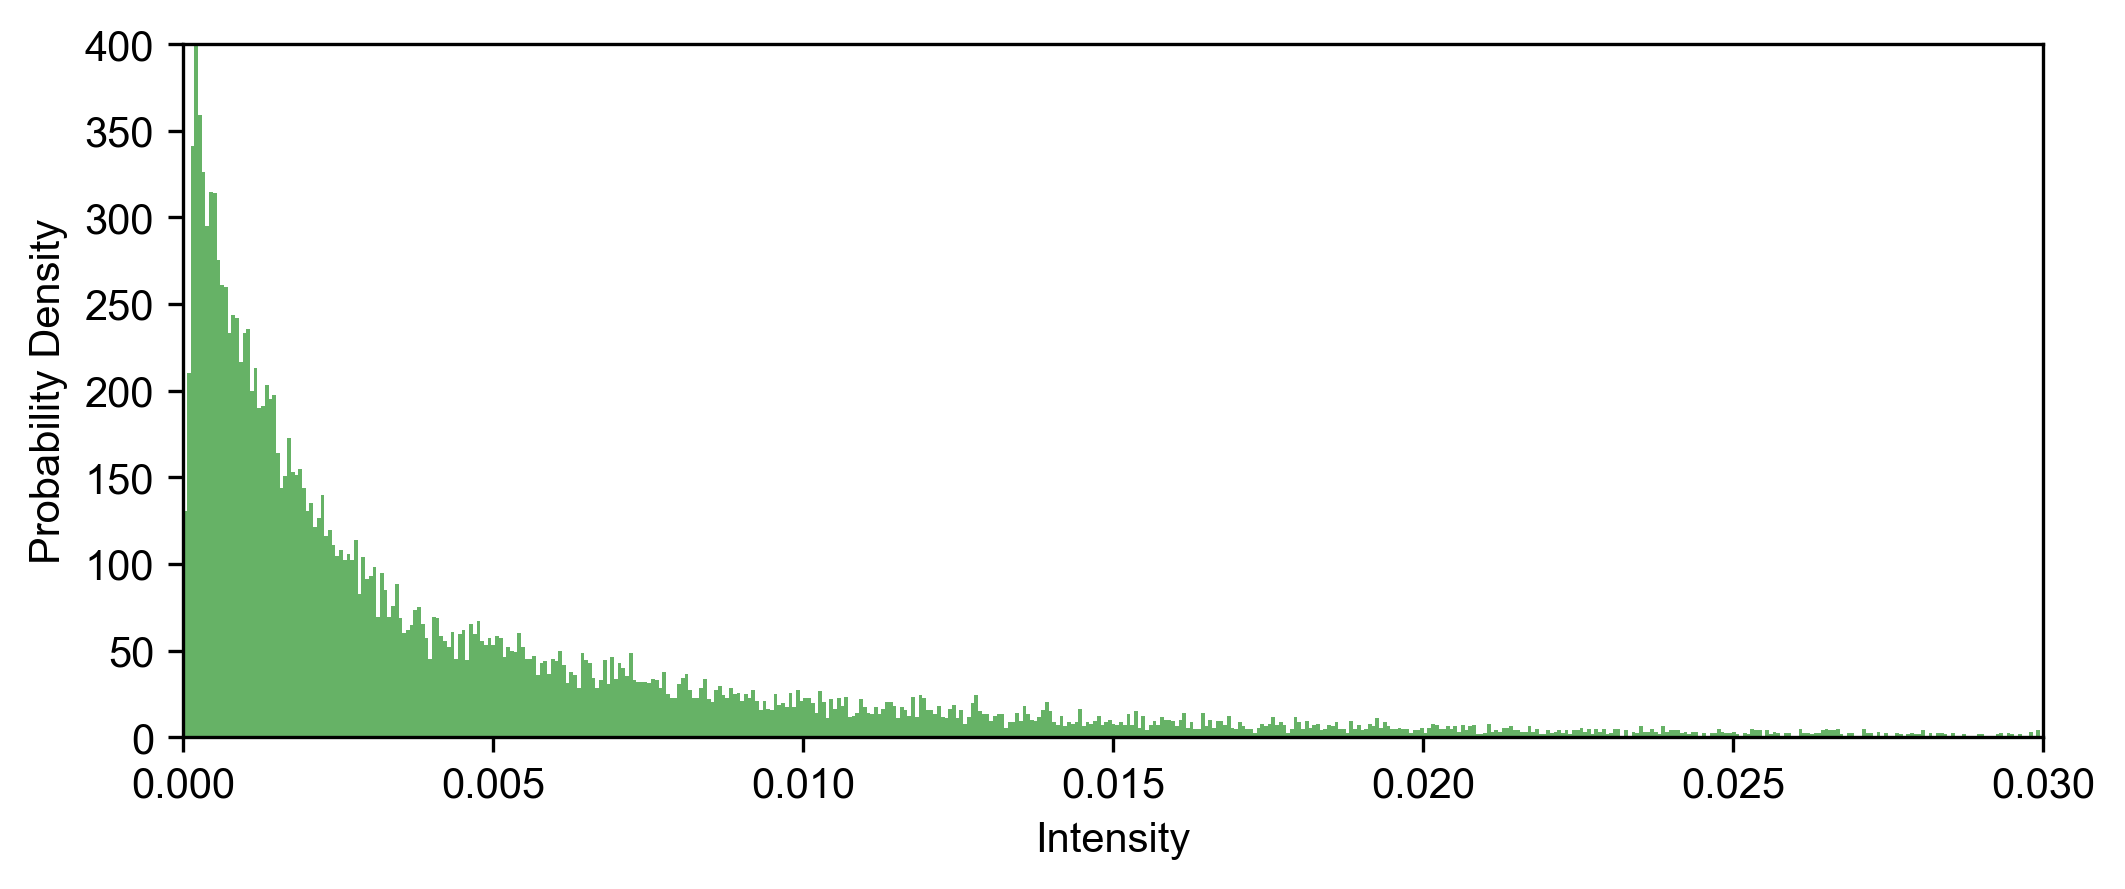

In [47]:
time_list = [2019, 2020, 2023]
plt.rcParams['font.family'] = 'Arial'
## 通过改i选时间！！！！！！！！！！！
i = 2
x = np.array(dis_dict[time_list[i]])
y = np.array(flow_dict[time_list[i]])
y = y[y>0]
y = y[y<0.03]

fig, ax = plt.subplots(figsize=(8, 3), dpi=300)  # 设置8x6的尺寸，100 DPI

# 绘制概率分布图
ax.hist(y, bins=500, density=True, alpha=0.6, color='g')

# 添加标题和标签
ax.set_xlim(0, 0.03)
ax.set_ylim(0, 400)
ax.set_xlabel('Intensity')
ax.set_ylabel('Probability Density')